<a href="https://colab.research.google.com/github/shivpandey2406/Machine-Learning-Project/blob/main/Decisiontree_ASM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/shivpandey2406/python_AIML.git

Cloning into 'python_AIML'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 105 (delta 14), reused 50 (delta 14), pack-reused 55
Receiving objects: 100% (105/105), 9.36 MiB | 8.24 MiB/s, done.
Resolving deltas: 100% (28/28), done.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import  pandas as pd

In [38]:
dataset = pd.read_csv("/content/python_AIML/bill_authentication.csv")
dataset.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [31]:
dataset.shape

(1372, 5)

In [13]:
dataset.tail()

,Variance,Skewness,Curtosis,Entropy,Class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


## Frequency distribution of values in variables

In [42]:
col_names = ['Variance','Skewness','Curtosis','Entropy', 'Class']


for col in col_names:

  print(dataset[col].value_counts())

Variance
 0.5706    5
 0.5195    4
 0.3292    4
 0.3798    4
-2.6479    3
          ..
 0.1848    1
 4.5707    1
 2.9742    1
 1.1472    1
-2.5419    1
Name: count, Length: 1338, dtype: int64
Skewness
-4.45520    6
-3.26330    5
 0.70980    4
-3.79710    4
-0.02480    4
           ..
 8.81100    1
 6.40230    1
 7.27970    1
 2.10860    1
-0.65804    1
Name: count, Length: 1256, dtype: int64
Curtosis
 1.2421    5
 4.5718    5
 3.0895    5
 0.7572    4
-3.7044    3
          ..
-2.0439    1
 1.0588    1
-0.7843    1
-2.9024    1
 2.6842    1
Name: count, Length: 1270, dtype: int64
Entropy
-0.29570    5
-0.98880    5
-0.44440    4
 0.36119    4
-0.23751    4
           ..
 0.75558    1
-0.44182    1
-0.24010    1
-1.30820    1
-2.77710    1
Name: count, Length: 1156, dtype: int64
Class
0    762
1    610
Name: count, dtype: int64


## Explore class variable

The class target variable is ordinal in nature.



In [45]:
dataset['Class'].value_counts()

Class
0    762
1    610
Name: count, dtype: int64

# Missing values in variables

In [47]:
# check missing values in variables

dataset.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

#Declare feature vector and target variable

In [48]:
X = dataset.drop(['Class'], axis=1)

y = dataset['Class']

In [37]:
dataset.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [16]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [49]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1097, 4), (275, 4))

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test =sc.fit_transform(X_test)

In [55]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [57]:
y_pred_gini = clf_gini.predict(X_test)
y_pred_gini

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [58]:
#Check accuracy score with criterion gini index
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9127


In [59]:
#Compare the train-set and test-set accuracy
#Now, I will compare the train-set and test-set accuracy to check for overfitting.
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([1, 1, 1, ..., 0, 0, 0])

In [60]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9407


#Check for overfitting and underfitting

In [61]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9407
Test set score: 0.9127


In [62]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy',random_state= 0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [63]:
y_pred = classifier.predict(X_test)
print(y_pred.shape,y_test.shape)

(275,) (275,)


In [65]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion entropy: 0.9782


In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(y_test.shape)
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = accuracy_score (y_test, y_pred)*100
print('Accuracy is ' + str(accuracy) + ' %.')

(275,)
[[152   5]
 [  1 117]]
Accuracy is 97.81818181818181 %.


In [68]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(classifier.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(classifier.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9782


We can see that the training-set score and test-set score is same as above. The training-set accuracy score is 1.0000 while the test-set accuracy to be 0.9782 These two values are quite comparable. So, there is no sign of overfitting.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making.

We have another tool called Confusion matrix that comes to our rescue.

In [69]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[152   5]
 [  1 117]]


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       157
           1       0.96      0.99      0.97       118

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



In [23]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_0 <= -0.05
|   |--- feature_1 <= 0.69
|   |   |--- feature_2 <= 1.26
|   |   |   |--- feature_0 <= -0.24
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  -0.24
|   |   |   |   |--- feature_0 <= -0.23
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  -0.23
|   |   |   |   |   |--- class: 1
|   |   |--- feature_2 >  1.26
|   |   |   |--- feature_1 <= -1.15
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  -1.15
|   |   |   |   |--- class: 0
|   |--- feature_1 >  0.69
|   |   |--- feature_0 <= -1.36
|   |   |   |--- feature_3 <= -0.36
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  -0.36
|   |   |   |   |--- class: 0
|   |   |--- feature_0 >  -1.36
|   |   |   |--- class: 0
|--- feature_0 >  -0.05
|   |--- feature_0 <= 0.69
|   |   |--- feature_2 <= -0.84
|   |   |   |--- feature_1 <= 0.78
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  0.78
|   |   |   |   |--- class: 0
|   |   |--- feature_2 >  -0.84
|   |   |  

[Text(0.5208333333333334, 0.9375, 'x[0] <= -0.051\nentropy = 0.992\nsamples = 1097\nvalue = [605, 492]'),
 Text(0.3125, 0.8125, 'x[1] <= 0.688\nentropy = 0.679\nsamples = 524\nvalue = [94, 430]'),
 Text(0.16666666666666666, 0.6875, 'x[2] <= 1.262\nentropy = 0.278\nsamples = 416\nvalue = [20, 396]'),
 Text(0.08333333333333333, 0.5625, 'x[0] <= -0.238\nentropy = 0.032\nsamples = 304\nvalue = [1, 303]'),
 Text(0.041666666666666664, 0.4375, 'entropy = 0.0\nsamples = 266\nvalue = [0, 266]'),
 Text(0.125, 0.4375, 'x[0] <= -0.235\nentropy = 0.176\nsamples = 38\nvalue = [1, 37]'),
 Text(0.08333333333333333, 0.3125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.16666666666666666, 0.3125, 'entropy = 0.0\nsamples = 37\nvalue = [0, 37]'),
 Text(0.25, 0.5625, 'x[1] <= -1.153\nentropy = 0.657\nsamples = 112\nvalue = [19, 93]'),
 Text(0.20833333333333334, 0.4375, 'entropy = 0.0\nsamples = 93\nvalue = [0, 93]'),
 Text(0.2916666666666667, 0.4375, 'entropy = 0.0\nsamples = 19\nvalue = [19, 0]')

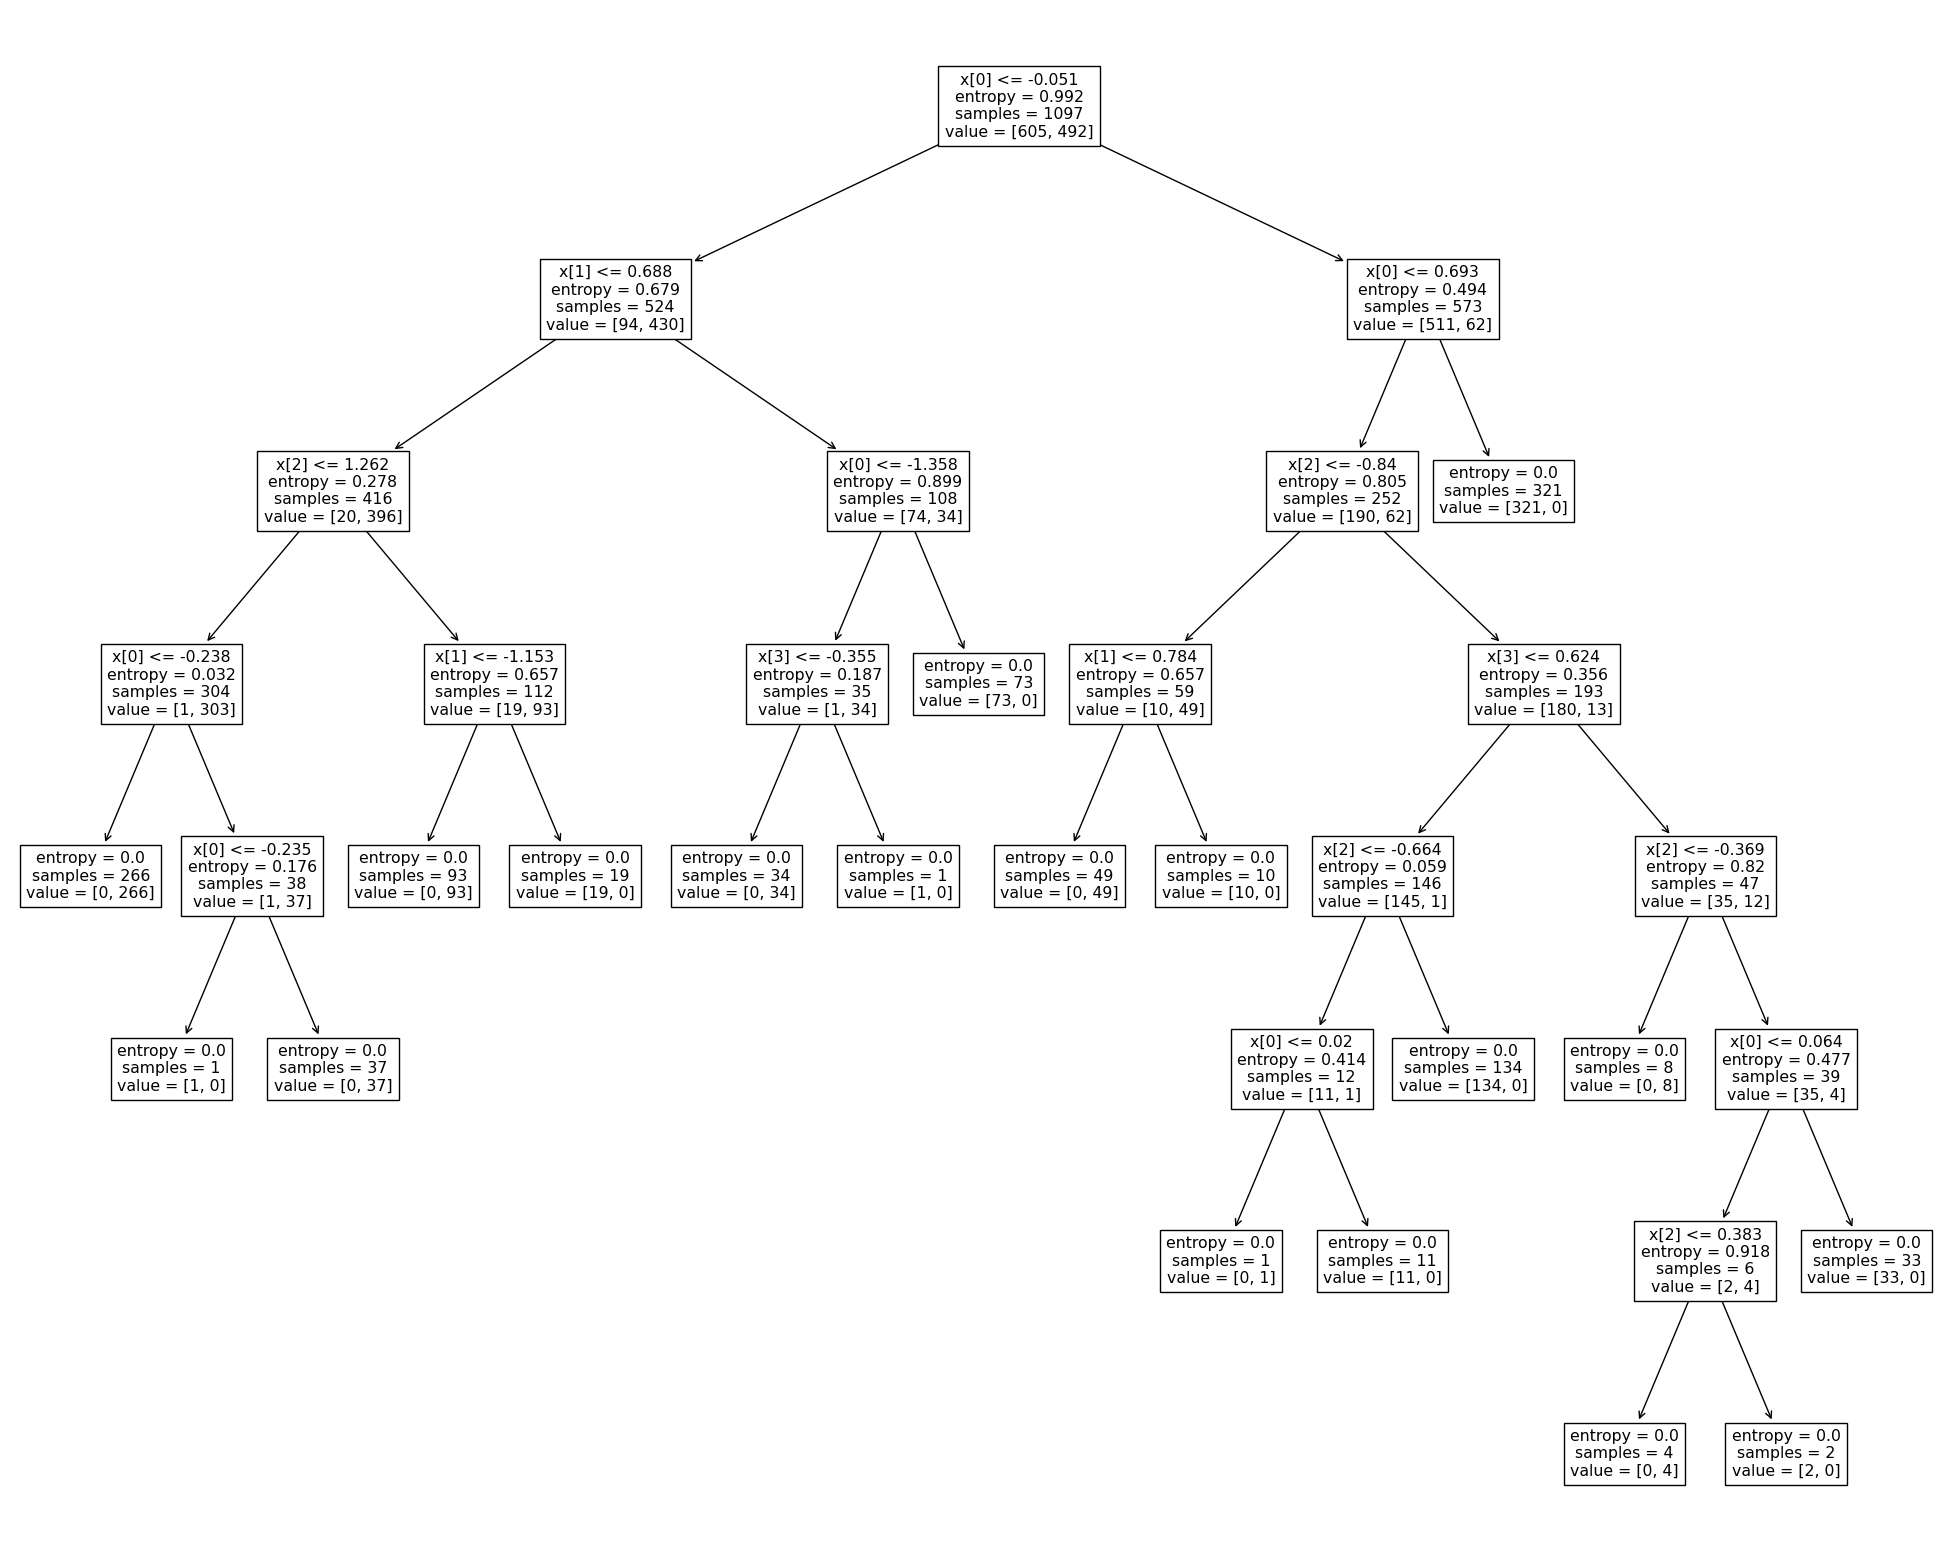

In [24]:

fig = plt.figure(figsize=(25,20))
tree.plot_tree(classifier)